In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from datetime import datetime

In [ ]:
def parser(x):
	return datetime.strptime(x, '%Y-%m-%d')

In [ ]:
example = parser('1995-01-20')

example

datetime.datetime(1995, 1, 20, 0, 0)

In [ ]:
dataset = pd.read_csv('/content/drive/My Drive/Datasets/daily-min-temperatures.csv', header=0, parse_dates=[0], index_col=0, squeeze=False, date_parser=parser)

dataset.head()

# Output berbentuk Series, bukan DataFrame (karena nilai squeeze=True)

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


In [ ]:
dataset.describe()

,Temp
count,3650.000000
mean,11.177753
std,4.071837
min,0.000000
25%,8.300000
50%,11.000000
75%,14.000000
max,26.300000


**Univariate** Time-Series Data: memiliki 1 attribute lain selain date

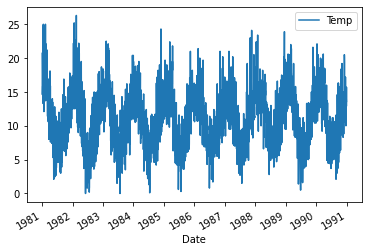

In [ ]:
dataset.plot()
plt.show()

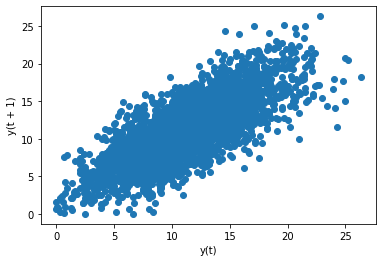

In [ ]:
from pandas.plotting import lag_plot

lag_plot(dataset)
plt.show()

Yang diinginkan (diagonal)

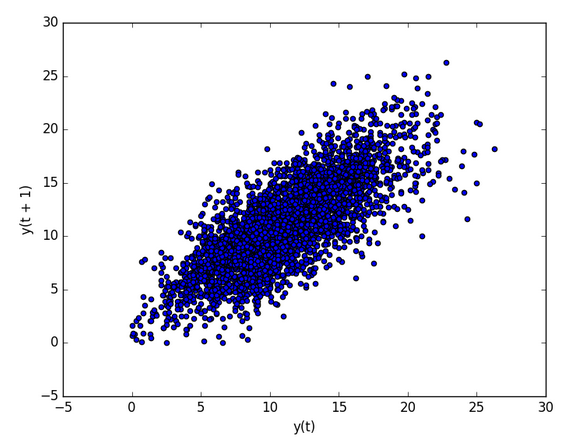

**Apabila dilihat sebagai sebuah problem regression**

In [ ]:
dataframe = pd.DataFrame()
dataframe['month'] = [dataset.index[i].month for i in range(len(dataset))] 
dataframe['day'] = [dataset.index[i].day for i in range(len(dataset))] 
dataframe['temperature'] = dataset['Temp'].values 
print(dataframe.head(5))

   month  day  temperature
0      1    1         20.7
1      1    2         17.9
2      1    3         18.8
3      1    4         14.6
4      1    5         15.8


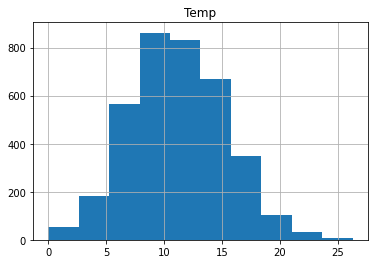

In [ ]:
dataset.hist()
plt.show()

In [ ]:
dataset.plot(kind='kde') 
plt.show()

**Box Plot**

https://www.statisticshowto.com/probability-and-statistics/descriptive-statistics/box-plot/

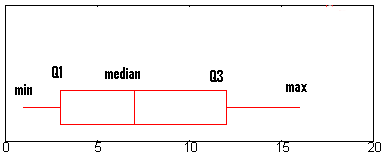

Pandas grouper parameters: https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases

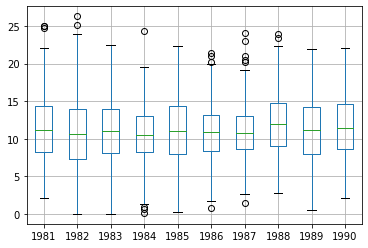

In [ ]:
groups = dataset.groupby(pd.Grouper(freq='A'))
print(groups) 
years = pd.DataFrame()
for name, group in groups:
  years[name.year] = group.values.flatten()
years.boxplot()
plt.show()

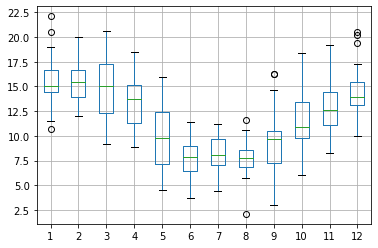

In [ ]:
one_year = dataset['1990']
groups = one_year.groupby(pd.Grouper(freq='M'))
months = pd.concat([pd.DataFrame(x[1].values) for x in groups], axis=1)
months = pd.DataFrame(months)

months.columns = range(1, 13)
months.boxplot()
plt.show()

In [ ]:
values = dataset.values
values = values.astype('float32')

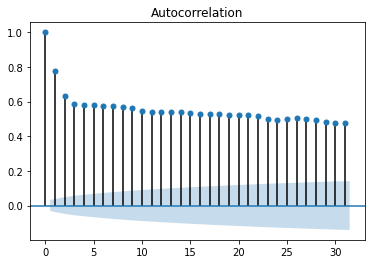

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(dataset, lags=31, ax=plt.gca())
plt.show()

Autocorrelation menunjukan apabila data pada suatu rentang waktu memiliki hubungan linear terhadap dirinya sendiri di masa lampau (lagged data).

In [ ]:
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
from math import sqrt

In [ ]:
train_size = int(len(values) * 0.50)
train, test = values[0:train_size], values[train_size:]

# Autoregression

In [ ]:
values = dataset.values
train, test = values[:len(values)-7], values[len(values)-7:]

print(len(values))
print(values)
print(len(values[1:len(values)-7]))
print(len(values[len(values)-7:]))

3650
[[20.7]
 [17.9]
 [18.8]
 ...
 [13.5]
 [15.7]
 [13. ]]
3642
7


In [ ]:
model = AR(train)
model_fit = model.fit()
print('Lag:', model_fit.k_ar)
print('Coefficients:', model_fit.params)

Lag: 29
Coefficients: [ 0.5597728   0.58866203 -0.09081226  0.04816399  0.03999111  0.03936764
  0.02594672  0.04467485  0.01314313  0.03714477 -0.00064057  0.00493921
  0.01802399  0.02696084  0.00062344  0.02445702  0.00735302  0.00992487
  0.03438475 -0.00909555  0.02416519  0.01856562  0.01229534 -0.01851848
 -0.00171714  0.01671254  0.019966    0.00963099  0.00636304 -0.0015663 ]


In [ ]:
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False) 
for i in range(len(predictions)):
  print('predicted=%f, expected=%f' % (predictions[i], test[i])) 
  rmse = sqrt(mean_squared_error(test, predictions))

print('Test RMSE: %.3f' % rmse)

predicted=11.872160, expected=12.900000
predicted=13.055704, expected=14.600000
predicted=13.531810, expected=14.000000
predicted=13.242590, expected=13.600000
predicted=13.091564, expected=13.500000
predicted=13.146082, expected=15.700000
predicted=13.176492, expected=13.000000
Test RMSE: 1.225


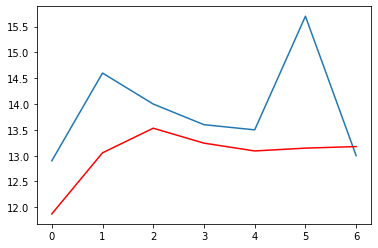

In [ ]:
plt.plot(test) 
plt.plot(predictions, color='red') 
plt.show()